In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pyportfolio import Portfolio
import seaborn as sns

## Analyzing a Portfolio

What if we have a portfolio already created? How can we see what the expected performance will be?

We can set the weights of each asset we added to our portfolio like in the code below. Here we said we have 75% of our portfolio consists of SPY and the remaining 25 consists of IGIB. It doesn't do too good compared to the optimized portfolio above.

[*********************100%***********************]  2 of 2 completed


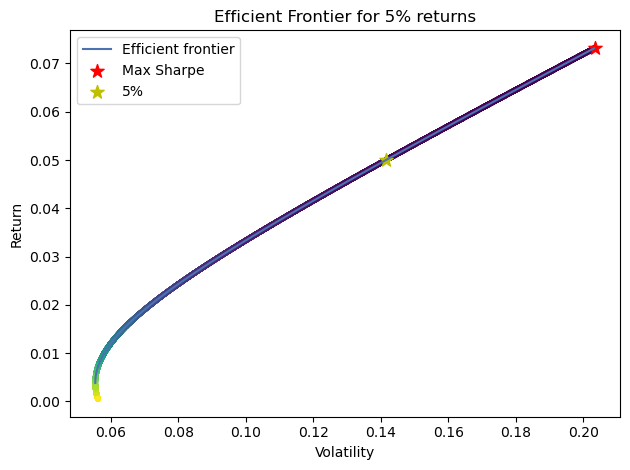

In [2]:
myPortfolio = Portfolio(portfolioName="Conservative", tickerString="SPY IGIB", expectedReturn=0.05, riskBucket=3)

myPortfolio.show_efficient_frontier()

In [3]:
myPortfolio.ef.set_weights({'SPY': 0.75, 'IGIB': 0.25})
myPortfolio.ef.portfolio_performance(verbose=True)

Expected annual return: 5.5%
Annual volatility: 15.5%
Sharpe Ratio: 0.23


(0.05503015037137665, 0.15467723522811158, 0.2264725660483628)

## Stock Correlation in Portfolio Mgt


In [12]:
assetList = ['BAC', 'WMT', 'JNPR', 'JNJ', 'CVS', 'BX', 'ORCL', 'T', 'SHEL', 'SPY', 'USRT', 'SPBO'] 

price_data = pd.DataFrame()
for asset in assetList:
    data = yf.download(asset, start="2021-01-01", end="2023-04-23")
    data["Symbol"] = asset
    price_data = pd.concat([price_data, data])

price_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
pivot_df = price_data.pivot('Date','Symbol','Close').reset_index()
pivot_df.head()

C:\Users\grant\AppData\Local\Temp\ipykernel_8528\3137756253.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = price_data.pivot('Date','Symbol','Close').reset_index()


Symbol,Date,BAC,BX,CVS,JNJ,JNPR,ORCL,SHEL,SPBO,SPY,T,USRT,WMT
0,2021-01-04,30.030001,63.000000,69.989998,156.500000,22.610001,63.750000,36.029999,36.080002,368.790009,22.235649,46.740002,146.529999
1,2021-01-05,30.260000,62.810001,70.459999,158.339996,23.360001,62.959999,38.509998,35.990002,371.329987,22.099697,46.689999,145.750000
2,2021-01-06,32.150002,61.660000,72.559998,159.830002,23.580000,62.570000,40.290001,35.740002,373.549988,22.530210,47.020000,146.660004
3,2021-01-07,32.860001,63.230000,73.989998,160.369995,23.830000,63.070000,40.340000,35.730000,379.100006,22.590633,46.830002,146.649994
4,2021-01-08,32.529999,62.900002,74.860001,160.039993,23.799999,63.380001,40.240002,35.700001,381.260010,21.918428,47.230000,146.630005


In [14]:
corr_df = pivot_df.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head()

C:\Users\grant\AppData\Local\Temp\ipykernel_8528\2888547379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = pivot_df.corr(method='pearson')


Symbol,BAC,BX,CVS,JNJ,JNPR,ORCL,SHEL,SPBO,SPY,T,USRT,WMT
Symbol,,,,,,,,,,,,
BAC,1.000000,0.731284,0.316738,0.058145,0.271173,0.454788,-0.353276,0.614478,0.835922,0.087544,0.815009,0.231402
BX,0.731284,1.000000,0.532243,0.191501,0.540849,0.587577,0.007884,0.274321,0.851105,-0.314904,0.864422,0.161976
CVS,0.316738,0.532243,1.000000,0.564655,0.655780,0.085723,0.457586,-0.363435,0.302316,-0.614433,0.456082,0.006593
JNJ,0.058145,0.191501,0.564655,1.000000,0.342647,-0.071798,0.196797,-0.192675,0.092735,-0.040239,0.267213,0.137108
JNPR,0.271173,0.540849,0.655780,0.342647,1.000000,0.520727,0.606677,-0.310718,0.486612,-0.520599,0.459533,0.378661


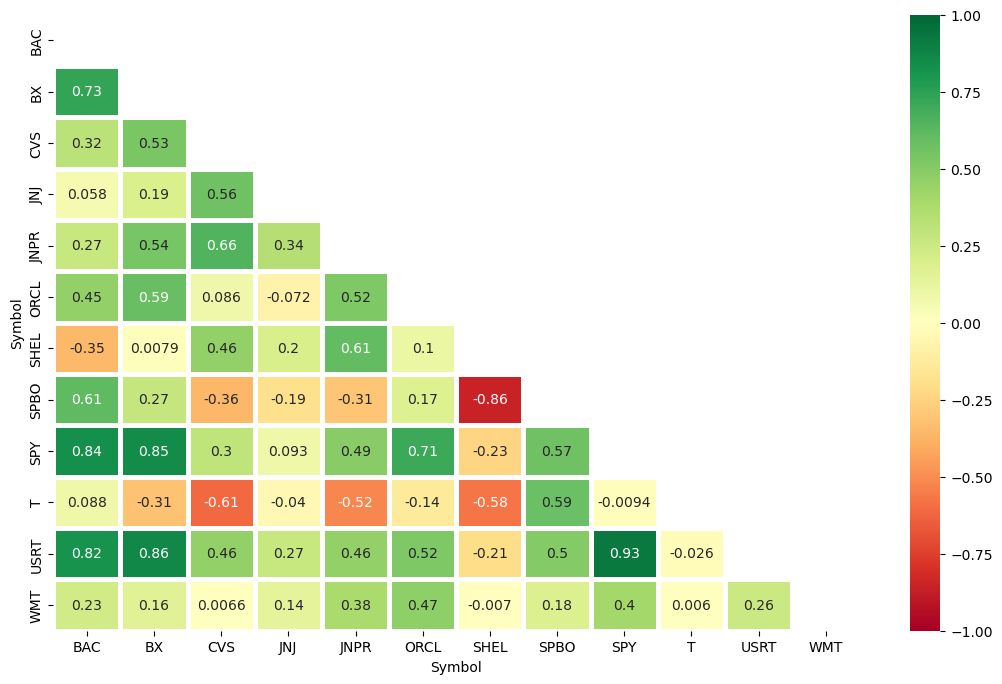

In [15]:
#grab bottom half
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

#plot correlations
plt.figure(figsize=(13,8))
sns.heatmap(corr_df, annot=True, cmap='RdYlGn', vmax=1.0,vmin=-1.0, mask = mask, linewidths=2.5)
plt.show()

In [16]:
avg_corr = corr_df.mean()
print(avg_corr)

Symbol
BAC     0.421934
BX      0.452355
CVS     0.283321
JNJ     0.212174
JNPR    0.369279
ORCL    0.367639
SHEL    0.011246
SPBO    0.181473
SPY     0.493799
T      -0.046851
USRT    0.486343
WMT     0.268878
dtype: float64


In [17]:
print(avg_corr.mean())

0.2917990970550313
